## Anomaly detection
Background:
Anomalies can be broadly identified as patterns in datasets that do not follow a well-defined trend of normal behaviour, and the goal of anomaly detection is to detect all such behaviour if possible. Anomalies can arise out of errors in the data collection process but sometimes, and somewhat more interestingly, can be  indicative of a new, previously unknown, underlying process. Anomaly detection is a burgeoning research field and has a diverse range of applications including fraud detection, health care monitoring, fault detection in machines to name a few.


Problem:
With the advancements in machine learning techniques and proliferation in computing power in recent years, deep learning has specifically gained widespread attention as a testbed to learn intricate underlying representation of often complex real world datasets.The current project thus aims to compare the performance of deep learning based anomaly detection methods with more traditional approaches for anomaly detection  such as k-means, Isolation Forests and SVM. This comparison is particularly important for large scale datasets where performance of traditional models is expected to be less than optimal as it would be difficult for these models to capture complex structure of multidimensional real world datasets. 


Action: 
The project will begin with a brief literature review of the field, with a special focus on identifying relevant data sources and narrowing down the most relevant deep learning models suited for the model. 

The project will mainly focus on investigating Unsupervised deep anomaly detection methods, if a suitable data source with labelled dataset is identified then Semi-supervised and Supervised deep anomaly detection methods can be investigated as well. Various methods can be explored under deep learning based anomaly detection including Generative models and Deep Belief Networks. 

The project will also explore to use anomaly detection for condition monitoring i.e. pre-empting spurious behaviour through change point detection, which can have a lot of real-world applications in sectors including heavy industry, societal and heath industry.

More actions will be added as the project takes course...


## Team members
Dr Chaitanya Joshi

..


## Research question(s)
How do we identify whether data points are normal or anomalous?

Use anamoly detection for condition monitoring ?

??

## Resources

https://towardsdatascience.com/machine-learning-for-anomaly-detection-and-condition-monitoring-d4614e7de770


https://statsbot.co/blog/time-series-anomaly-detection-algorithms/



https://www.datascience.com/blog/python-anomaly-detection


https://towardsdatascience.com/time-series-of-price-anomaly-detection-13586cd5ff46




https://towardsdatascience.com/time-series-of-price-anomaly-detection-13586cd5ff46

https://github.com/yzhao062/anomaly-detection-resources


https://towardsdatascience.com/how-to-use-machine-learning-for-anomaly-detection-and-condition-monitoring-6742f82900d7



https://www.machinelearningplus.com/time-series/time-series-analysis-python/


https://github.com/Vicam/Unsupervised_Anomaly_Detection


https://scikit-learn.org/stable/modules/outlier_detection.html


https://medium.com/@luigi.bungaro/how-to-detect-anomalies-in-audio-signal-processing-of-the-heart-with-sound-coming-from-mobile-e034e8fd709b



https://towardsdatascience.com/time-series-of-price-anomaly-detection-13586cd5ff46



https://arxiv.org/pdf/1906.11632.pdf


https://arxiv.org/pdf/1901.03407.pdf

## Data Sources

Accessing real world data to train machine learning models for anomaly detection is a particularly difficult task as the relevant data sources tend to be commerically sensitive or contains personal information.

More open source datasets need to be identified.

[1] Acoustics and Vibration Database
http://data-acoustics.com/measurements/bearing-faults/bearing-4/

[2] Anomalies in the time series of hotel room prices
https://www.kaggle.com/c/expedia-personalized-sort/data



## Import the libraries and read the data

[1] We will first explore the acoustic dataset

About the dataset:

Data Structure
Three (3) data sets are included in the data packet (IMS-Rexnord Bearing Data.zip). Each data set describes a test-to-failure experiment. Each data set consists of individual files that are 1-second vibration signal snapshots recorded at specific intervals. Each file consists of 20,480 points with the sampling rate set at 20 kHz. The file name indicates when the data was collected. Each record (row) in the data file is a data point. Data collection was facilitated by NI DAQ Card 6062E. Larger intervals of time stamps (showed in file names) indicate resumption of the experiment in the next working day.

More details about the dataset can be found in the Readme document

In [5]:

from libraries import *

           0      1      2      3      4      5      6      7
9491  -0.042 -0.146 -0.120 -0.027 -0.315 -0.012 -0.139 -0.166
8747  -0.103 -0.051 -0.164 -0.242 -0.015 -0.032 -0.007 -0.383
13140 -0.229 -0.046 -0.144 -0.127 -0.115 -0.054 -0.115  0.017
15377 -0.122 -0.212 -0.137 -0.156  0.020 -0.107 -0.093 -0.195
17343 -0.151 -0.029 -0.173  0.000 -0.222  0.122 -0.122 -0.112


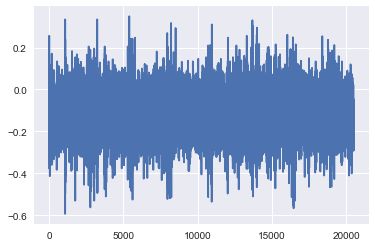

In [6]:
data_dir = '1st_test'
merged_data = pd.DataFrame()

filename=[x for x in os.listdir(data_dir)]

sampl=100


dataset=pd.read_csv(os.path.join(data_dir, filename[sampl]), sep='\t',header=None)


print(dataset.sample(5))

plt.plot(dataset[0])


# Issue: need to consider more carefully how to 'simplify' the high frequency component-

##https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788

In [7]:
for filename in os.listdir(data_dir):
    #print(filename)
    dataset=pd.read_csv(os.path.join(data_dir, filename), sep='\t',header=None)
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,8))
    dataset_mean_abs.index = [filename]
    merged_data = merged_data.append(dataset_mean_abs)

merged_data.columns = ['Bearing ' +str(x) for x in range(1,9)]

In [9]:
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()
merged_data.to_csv('merged_dataset_BearingTest_1.csv')
merged_data.head(5)

,Bearing 1,Bearing 2,Bearing 3,Bearing 4,Bearing 5,Bearing 6,Bearing 7,Bearing 8
2003-10-22 12:06:24,0.104144,0.100250,0.107151,0.102002,0.106148,0.108152,0.094804,0.099515
2003-10-22 12:09:13,0.103652,0.099853,0.108190,0.102922,0.106660,0.108453,0.095070,0.093585
2003-10-22 12:14:13,0.105036,0.101540,0.108548,0.104041,0.108741,0.109881,0.096157,0.098300
2003-10-22 12:19:13,0.104898,0.101570,0.108150,0.103379,0.108073,0.110006,0.096813,0.098600
2003-10-22 12:24:13,0.104776,0.102188,0.107943,0.102626,0.108453,0.109349,0.096359,0.098468


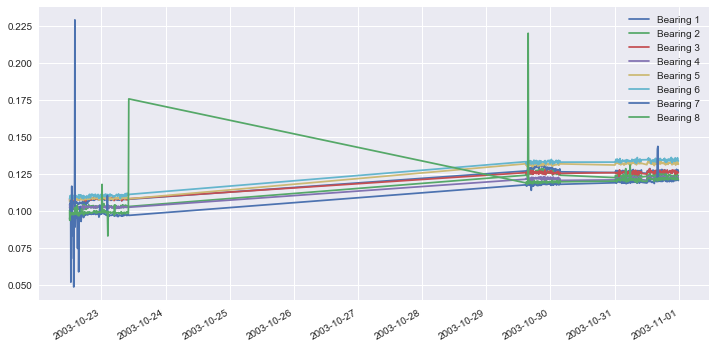

In [26]:


dataset_train = merged_data[merged_data.index.month==10]

dataset_test = merged_data[merged_data.index.month!=10]
dataset_train.plot(figsize = (12,6))


In [27]:
scaler = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(dataset_train), 
                              columns=dataset_train.columns, 
                              index=dataset_train.index)
# Random shuffle training data
X_train.sample(frac=1)

X_test = pd.DataFrame(scaler.transform(dataset_test), 
                             columns=dataset_test.columns, 
                             index=dataset_test.index)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver= 'full')
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train.index

X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(X_test_PCA)
X_test_PCA.index = X_test.index

In [29]:
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")

In [30]:
def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

In [31]:
def MD_detectOutliers(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

In [32]:
def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold

In [33]:
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [34]:
data_train = np.array(X_train_PCA.values)
data_test = np.array(X_test_PCA.values)

In [35]:
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)

In [36]:
mean_distr = data_train.mean(axis=0)

In [47]:
dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)
threshold

4.060263059716102

/Users/joshic/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0.0, 15)

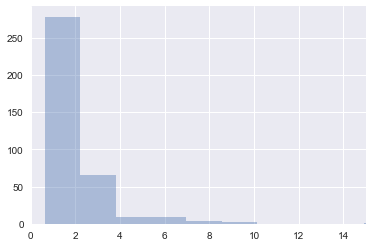

In [45]:
plt.figure()
sns.distplot(np.square(dist_train),
             bins = 10, 
             kde= False);
plt.xlim([0.0,15])

/Users/joshic/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/joshic/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Mahalanobis dist')

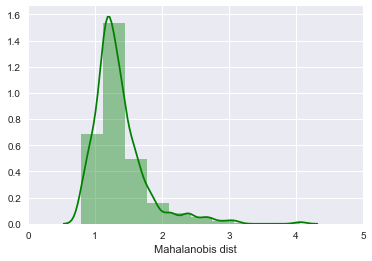

In [46]:
plt.figure()
sns.distplot(dist_train,
             bins = 10, 
             kde= True, 
            color = 'green');
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')

In [48]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_test
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_test_PCA.index
anomaly.head()

,Mob dist,Thresh,Anomaly
2003-11-01 00:01:44,1.913350,4.060263,False
2003-11-01 00:11:44,1.136010,4.060263,False
2003-11-01 00:21:44,1.478921,4.060263,False
2003-11-01 00:31:44,1.180514,4.060263,False
2003-11-01 00:41:44,1.317419,4.060263,False


In [49]:
anomaly_alldata = pd.concat([anomaly_train, anomaly])
anomaly_alldata.to_csv('Anomaly_distance.csv')

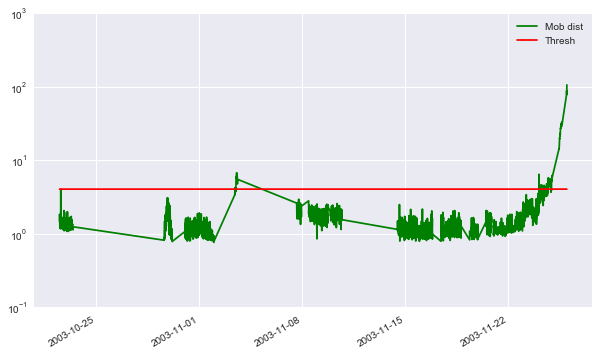

In [50]:
anomaly_alldata.plot(logy=True, figsize = (10,6), ylim = [1e-1,1e3], color = ['green','red'])

In [51]:
seed(10)
set_random_seed(10)
act_func = 'elu'

# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X. 
model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )

model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')

# Train model for 100 epochs, batch size of 10: 
NUM_EPOCHS=100
BATCH_SIZE=10

In [52]:
history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1)

Train on 349 samples, validate on 19 samples
Epoch 1/100
349/349 [==============================] - 0s 866us/step - loss: 0.4032 - val_loss: 0.5273
Epoch 2/100
349/349 [==============================] - 0s 151us/step - loss: 0.2405 - val_loss: 0.3135
Epoch 3/100
349/349 [==============================] - 0s 157us/step - loss: 0.1424 - val_loss: 0.1751
Epoch 4/100
349/349 [==============================] - 0s 148us/step - loss: 0.0819 - val_loss: 0.0887
Epoch 5/100
349/349 [==============================] - 0s 153us/step - loss: 0.0447 - val_loss: 0.0369
Epoch 6/100
349/349 [==============================] - 0s 144us/step - loss: 0.0240 - val_loss: 0.0138
Epoch 7/100
349/349 [==============================] - 0s 150us/step - loss: 0.0141 - val_loss: 0.0044
Epoch 8/100
349/349 [==============================] - 0s 151us/step - loss: 0.0093 - val_loss: 0.0019
Epoch 9/100
349/349 [==============================] - 0s 146us/step - loss: 0.0068 - val_loss: 0.0011
Epoch 10/100
349/349 [======

Epoch 77/100
349/349 [==============================] - 0s 153us/step - loss: 0.0010 - val_loss: 5.5667e-04
Epoch 78/100
349/349 [==============================] - 0s 154us/step - loss: 0.0010 - val_loss: 4.4620e-04
Epoch 79/100
349/349 [==============================] - 0s 168us/step - loss: 9.9579e-04 - val_loss: 5.2872e-04
Epoch 80/100
349/349 [==============================] - 0s 155us/step - loss: 9.9694e-04 - val_loss: 4.6829e-04
Epoch 81/100
349/349 [==============================] - 0s 154us/step - loss: 9.8400e-04 - val_loss: 4.3717e-04
Epoch 82/100
349/349 [==============================] - 0s 145us/step - loss: 9.7612e-04 - val_loss: 3.9904e-04
Epoch 83/100
349/349 [==============================] - 0s 149us/step - loss: 9.8077e-04 - val_loss: 4.5126e-04
Epoch 84/100
349/349 [==============================] - 0s 150us/step - loss: 9.8039e-04 - val_loss: 4.1057e-04
Epoch 85/100
349/349 [==============================] - 0s 163us/step - loss: 9.7179e-04 - val_loss: 3.9235e-04


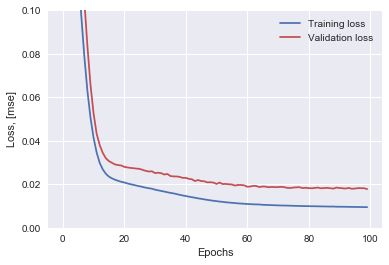

In [45]:
plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.1])
plt.show()

/Users/joshic/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/joshic/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0.0, 0.5)

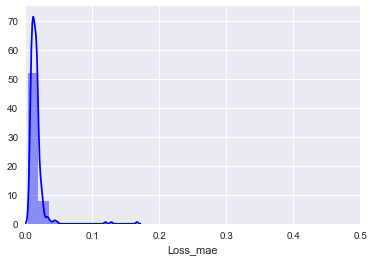

In [53]:
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10, 
             kde= True,
            color = 'blue');
plt.xlim([0.0,.5])

In [54]:
X_pred = model.predict(np.array(X_test))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_test.columns)
X_pred.index = X_test.index

scored = pd.DataFrame(index=X_test.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_test), axis = 1)
scored['Threshold'] = 0.3
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
2003-11-01 00:01:44,0.016448,0.3,False
2003-11-01 00:11:44,0.012311,0.3,False
2003-11-01 00:21:44,0.008228,0.3,False
2003-11-01 00:31:44,0.013724,0.3,False
2003-11-01 00:41:44,0.009331,0.3,False


In [55]:
X_pred_train = model.predict(np.array(X_train))
X_pred_train = pd.DataFrame(X_pred_train, 
                      columns=X_train.columns)
X_pred_train.index = X_train.index

scored_train = pd.DataFrame(index=X_train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-X_train), axis = 1)
scored_train['Threshold'] = 0.3
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

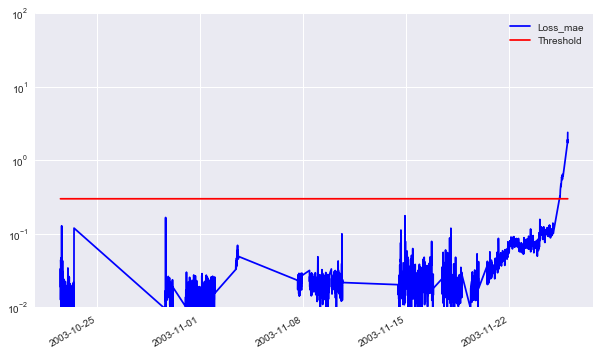

In [56]:
scored.plot(logy=True,  figsize = (10,6), ylim = [1e-2,1e2], color = ['blue','red'])